## Bike Store Sales EDA

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [24]:
# loading the data
df = pd.read_csv('data/sales.csv', parse_dates=['Date'])

### Data at a glance

In [29]:
df.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


In [30]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000
mean,15.614417,2014.571724,36.170792,14.918674,11.794552,25.047374,149.786929,166.584920,316.371849
std,8.808628,1.115733,11.007055,8.685807,12.404727,23.529555,171.161906,211.934818,330.738529
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,-25.000000,2.000000,4.000000
25%,8.000000,2014.000000,28.000000,7.000000,3.000000,8.000000,31.000000,38.000000,81.000000
50%,16.000000,2014.000000,35.000000,15.000000,8.000000,22.000000,78.000000,87.000000,176.000000
75%,23.000000,2016.000000,44.000000,22.000000,13.000000,35.000000,227.000000,216.000000,485.000000
max,31.000000,2016.000000,87.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


In [27]:
df.shape

(48275, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48275 entries, 0 to 48274
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              48275 non-null  object
 1   Day               48275 non-null  int64 
 2   Month             48275 non-null  object
 3   Year              48275 non-null  int64 
 4   Customer_Age      48275 non-null  int64 
 5   Age_Group         48275 non-null  object
 6   Customer_Gender   48275 non-null  object
 7   Country           48275 non-null  object
 8   State             48275 non-null  object
 9   Product_Category  48275 non-null  object
 10  Sub_Category      48275 non-null  object
 11  Product           48275 non-null  object
 12  Order_Quantity    48275 non-null  int64 
 13  Unit_Cost         48275 non-null  int64 
 14  Unit_Price        48275 non-null  int64 
 15  Profit            48275 non-null  int64 
 16  Cost              48275 non-null  int64 
 17  Revenue     

### Numerical Analysis and Visualization

Analyze the Unit_Cost column

In [31]:
df_unit_cost = df['Unit_Cost'].describe()
df_unit_cost

count    48275.000000
mean        11.794552
std         12.404727
min          2.000000
25%          3.000000
50%          8.000000
75%         13.000000
max         59.000000
Name: Unit_Cost, dtype: float64

In [32]:
df['Unit_Cost'].mean()

11.794552045572242

In [33]:
df['Unit_Cost'].median()

8.0

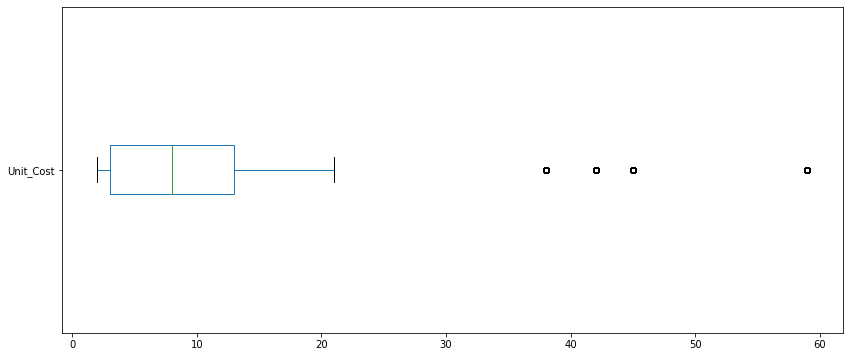

In [34]:
df['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

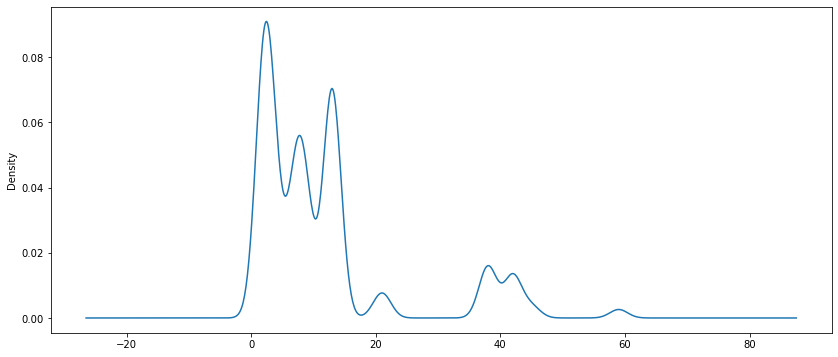

In [36]:
df['Unit_Cost'].plot(kind='density', figsize=(14,6)) #KDE

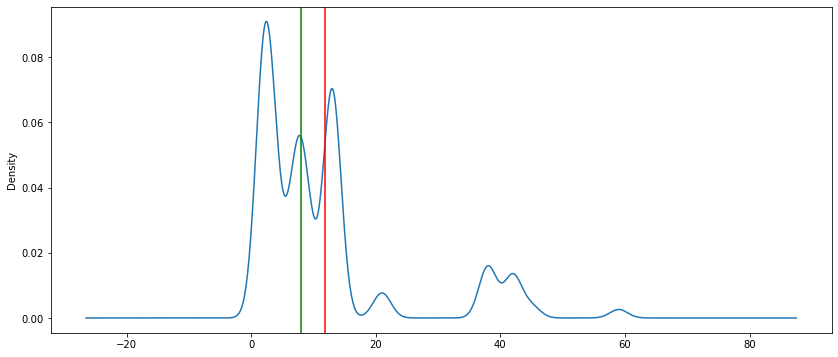

In [38]:
ax = df['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['Unit_Cost'].mean(), color='red')
ax.axvline(df['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

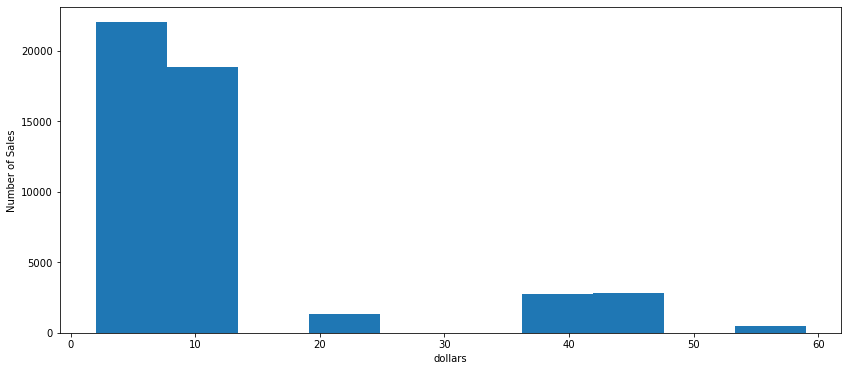

In [39]:
ax = df['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

### Categorical analysis and visualization¶

Analyze the Age_Group column:


In [40]:
df['Age_Group'].value_counts()

Adults (35-64)          24403
Young Adults (25-34)    16224
Youth (<25)              7350
Seniors (64+)             298
Name: Age_Group, dtype: int64

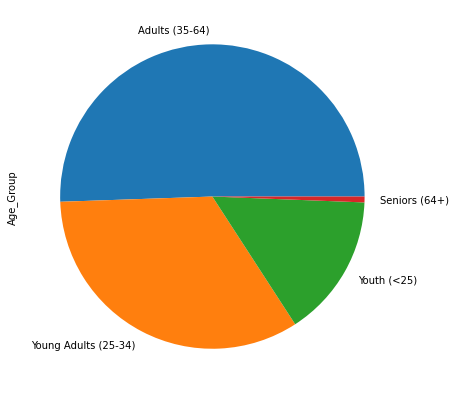

In [46]:
df['Age_Group'].value_counts().plot(kind='pie', figsize=(7,7))

Text(0, 0.5, 'Number of sales')

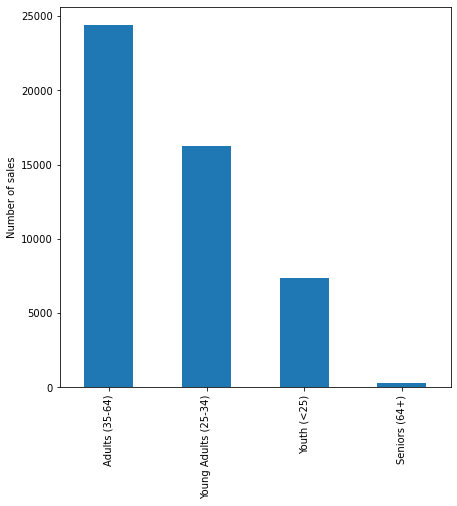

In [47]:
ax = df['Age_Group'].value_counts().plot(kind='bar', figsize=(7,7))
ax.set_ylabel('Number of sales')

### Relationship between the columns?

Is there a relationship between the columns?

In [49]:
corr = df.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.004165,-0.015857,-0.003060,0.005209,0.010416,0.009504,0.001581,0.005932
Year,-0.004165,1.000000,0.023321,-0.028640,-0.013611,-0.014773,-0.023729,-0.023383,-0.027264
Customer_Age,-0.015857,0.023321,1.000000,0.011721,0.015799,0.023411,0.040952,0.027868,0.039051
Order_Quantity,-0.003060,-0.028640,0.011721,1.000000,-0.087005,-0.117119,0.445629,0.416464,0.497486
Unit_Cost,0.005209,-0.013611,0.015799,-0.087005,1.000000,0.882966,0.292853,0.713983,0.609071
Unit_Price,0.010416,-0.014773,0.023411,-0.117119,0.882966,1.000000,0.512291,0.546126,0.615072
Profit,0.009504,-0.023729,0.040952,0.445629,0.292853,0.512291,1.000000,0.484839,0.828195
Cost,0.001581,-0.023383,0.027868,0.416464,0.713983,0.546126,0.484839,1.000000,0.891704
Revenue,0.005932,-0.027264,0.039051,0.497486,0.609071,0.615072,0.828195,0.891704,1.000000


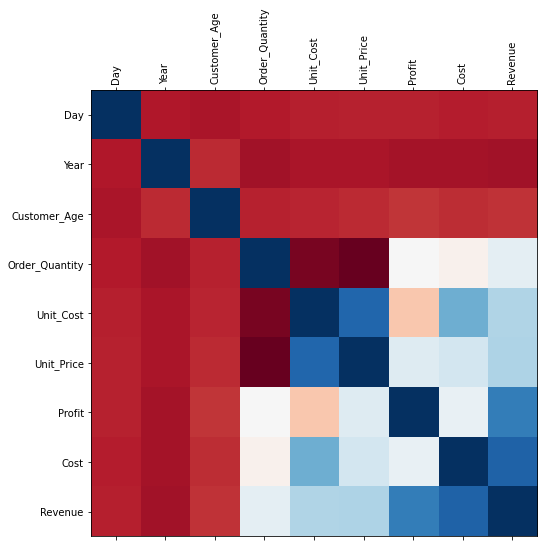

In [50]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

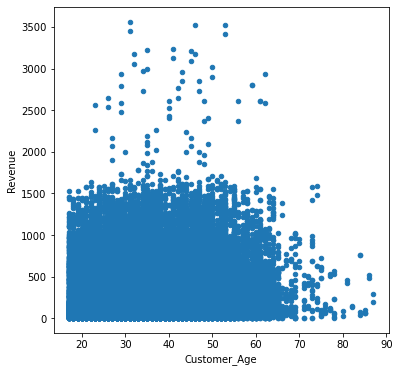

In [51]:
# Correlation between Revenue and Customer Age
df.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

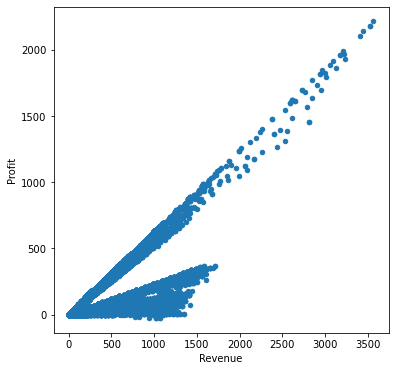

In [52]:
# Correlation between Revenue and Profit
df.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

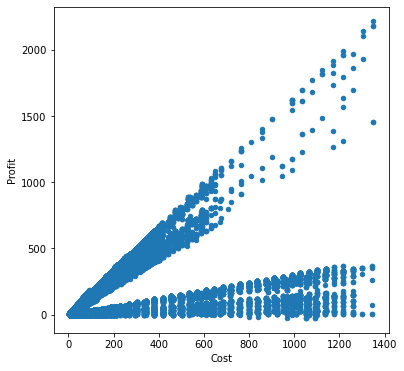

In [54]:
# Correlation between Cost and Profit
df.plot(kind='scatter', x='Cost', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

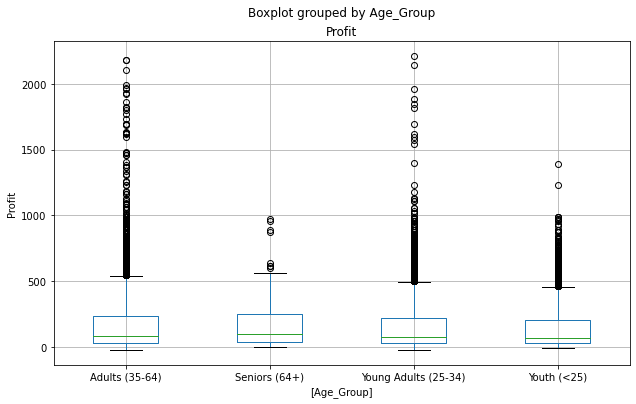

In [56]:
# Profit per Age Group
ax = df[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

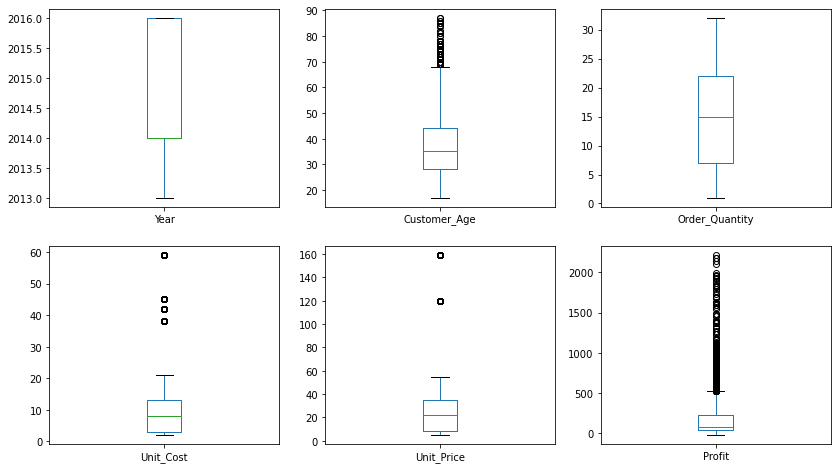

In [57]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

### Column Wrangling

Introducing new columns or modifying existing ones

#### Add and calculate a new Revenue_per_Age column

In [61]:
df['Revenue_per_Age'] = df['Revenue']/ df['Customer_Age']
df['Revenue_per_Age'].head(4)

0    50.000000
1    50.000000
2    49.000000
3    42.612245
Name: Revenue_per_Age, dtype: float64

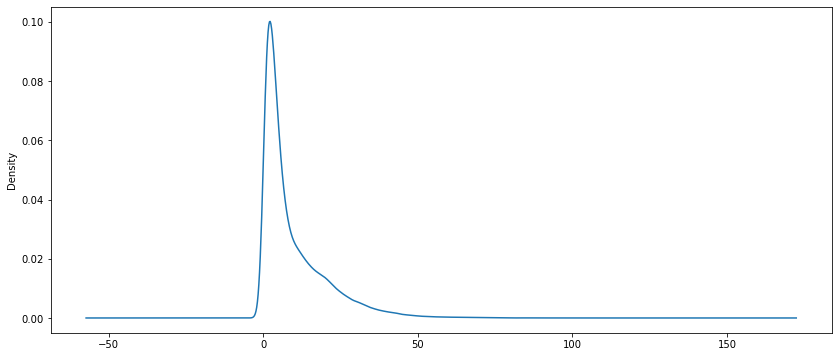

In [62]:
df['Revenue_per_Age'].plot(kind='density', figsize=(14, 6))

#### Add and calculate a new Calculated_Cost column

Formula: Calculated_Cost = Order_Quantity * Unit_Cost 

In [64]:
df['Calculated_Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Calculated_Cost'].head(4)

0     360
1     360
2    1035
3     900
Name: Calculated_Cost, dtype: int64

In [67]:
(df['Calculated_Cost'] != df['Cost']).sum()


0

Relationship between Cost and Profit using a scatter plot:



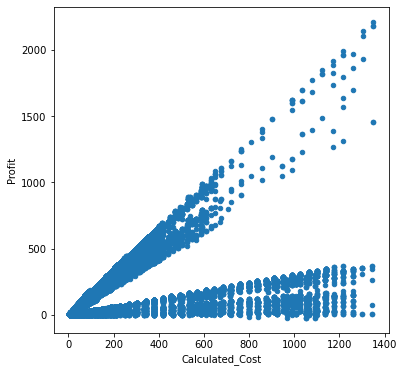

In [68]:
df.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))


#### Add and calculate a new Calculated_Revenue column¶

Formula: Calculated_Revenue = Cost + Profit

In [70]:
df['Calculated_Revenue'] = df['Cost'] + df['Profit']

df['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64